## Loading Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore, pearsonr, chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import f_oneway
from scipy import stats

## Loading Datasets

In [2]:
#Datasets
products= pd.read_csv('../data/products.csv')
orders= pd.read_csv('../results/orders_processed.csv')
order_products= pd.read_csv('../data/order_products.csv')
aisles= pd.read_csv('../data/aisles.csv')
data= pd.read_csv('../results/encoded_data.csv')

## Displaying the Datasets

In [3]:
# Displaying products.csv
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
# Displaying orders.csv
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,0.0
1,2398795,1,2,3,7,16.0
2,473747,1,3,3,12,22.0
3,2254736,1,4,4,7,30.0
4,431534,1,5,4,15,29.0


In [5]:
# Displaying order_products.csv
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
# Displaying aisles.csv
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
# Displaying merged dataset
data.head()

,Unnamed: 0,order_id,product_id,aisle_id,department_id,user_id,aisle,product_name,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,aisle_target_enc,product_name_target_enc,encoded_days_since_prior_order
0,2045015,215678,2664,92,18,74160,baby food formula,First Prunes,18,2,12,12.0,7,0,0.591705,0.620690,recently_ordered
1,13212535,1394471,18471,29,13,21299,honeys syrups nectars,Organic Light Agave Nectar,10,2,16,4.0,5,0,0.383502,0.351351,undefined
2,25783757,2719214,35515,105,13,166931,doughs gelatins bake mixes,Peanut Butter Cookie Mix,1,6,11,0.0,1,0,0.424214,0.333333,undefined
3,31007500,3270713,17862,81,15,145193,canned jarred vegetables,Minced Garlic,38,1,8,6.0,11,1,0.420020,0.290909,undefined
4,11043095,1165817,13415,98,7,197157,juice nectars,100% Pear Juice,10,0,23,24.0,15,1,0.598418,0.333333,infrequently_ordered


In [8]:
data = data.drop(columns=['Unnamed: 0'])

In [9]:
data.head()

,order_id,product_id,aisle_id,department_id,user_id,aisle,product_name,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,aisle_target_enc,product_name_target_enc,encoded_days_since_prior_order
0,215678,2664,92,18,74160,baby food formula,First Prunes,18,2,12,12.0,7,0,0.591705,0.620690,recently_ordered
1,1394471,18471,29,13,21299,honeys syrups nectars,Organic Light Agave Nectar,10,2,16,4.0,5,0,0.383502,0.351351,undefined
2,2719214,35515,105,13,166931,doughs gelatins bake mixes,Peanut Butter Cookie Mix,1,6,11,0.0,1,0,0.424214,0.333333,undefined
3,3270713,17862,81,15,145193,canned jarred vegetables,Minced Garlic,38,1,8,6.0,11,1,0.420020,0.290909,undefined
4,1165817,13415,98,7,197157,juice nectars,100% Pear Juice,10,0,23,24.0,15,1,0.598418,0.333333,infrequently_ordered


## Exploratory Data Analysis

### Univariate Analysis

#### Describing the datasets

In [10]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.138460e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.379136e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.600000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.100000e+01


#### Key Insights:
* **order_id:** Ranges from 1 to 3.4 million, with a mean around 1.7 million. High standard deviation (987k) means orders are spread out across a wide range of times.
* **user_id:** Over 200,000 unique users (range 1–206k). Mean user ID is ~103k. Standard deviation of 59k indicates that some users are much more active than others.
* **order_number:** Each user can place up to 100 orders (range 1–100). The average is 17 orders per user, but there's a lot of variation (std = 17.73), with some users placing many more than others.
* **order_dow (Day of Week):** Orders are spread across all days (0–6), with a slight preference for Wednesday (mean = 2.78). Standard deviation of 2.05 shows orders are fairly evenly distributed.
* **order_hour_of_day:** Orders are spread throughout the day (0–23), with a peak around 1:30 PM (mean = 13.45). Standard deviation of 4.23 shows there’s some variation in timing.
* **days_since_prior_order:** Ranges from -1 to 30 days. Average gap is 10.38 days, with a high standard deviation (9.38) showing that some customers return quickly, while others take longer breaks.

#### Inference:
* **Customer Activity:** 200k+ users, average 17 orders, but some are much more frequent buyers.
* **Timing:** Orders are spread across the week, peaking on Wednesdays, and most come in the afternoon.
* **Repeat Behavior:** Average return is every 10 days, but with big differences in how often users order.

In [11]:
products.describe()

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


### Key Insights:
* **product_id:**
    1. **Count:** 49,688 unique products.
    2. **Range:** From 1 to 49,688.
    3. **Distribution:** Evenly spread, with the median around 24,844.
* **aisle_id:**
    1. **Count:** Matches product count (49,688), so each product is assigned an aisle.
    2. **Range:** From 1 to 134 aisles.
    3. **Spread:** Aisle numbers are mostly centered, with the median at 69, showing product placement across aisles.
* **department_id:**
    1. **Count:** 49,688.
    2. **Range:** From 1 to 21 departments.
    3. **Spread:** Department IDs have moderate variability, with a median at 13, indicating a concentration of products in central departments.

In [12]:
order_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


### Key Insights: 
* **order_id:**
    1. **Total Orders:** 32.4 million.
    2. **Range:** From 2 to 3,421,083.
    3. **Median:** 1,711,048, showing a balanced order distribution.
* **product_id:**
    1. **Total Products in Orders:** 32.4 million.
    2. **Range:** Product IDs from 1 to 49,688.
    3. **Median:** Around 25,256, indicating diverse product selection.
* **add_to_cart_order:**
    1. **Mean:** 8.35, suggesting that products are generally added around the 8th position in carts.
    2. **Range:** From 1 (first in cart) to 145.
    3. **Spread:** Most products are added in the first few positions (median at 6), indicating early selections are common.
* **reordered:**
    1. Binary indicator (0 = not reordered, 1 = reordered).
    2. **Mean:** 0.59, showing that about 59% of products were reordered, highlighting customer loyalty and repeat purchases.

In [13]:
aisles.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


#### Key Insights:
The data shows a distribution with:
* A mean of 67.5, indicating the average value.
* A median (50th percentile) of 67.5, suggesting symmetry in the distribution.
* The standard deviation of 38.83 indicates moderate spread around the mean.
* 25th percentile (Q1) is 34.25 and the 75th percentile (Q3) is 100.75, showing that the data is spread across a wide range.
* The min is 1 and the max is 134, indicating the range of values in the dataset.
* Overall, the data seems moderately spread with a slight positive skew, given the mean and median are the same. The interquartile range (Q3-Q1) shows a spread of about 66.5.

In [14]:
data.describe()

,order_id,product_id,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,aisle_target_enc,product_name_target_enc
count,3.243440e+05,324344.000000,324344.000000,324344.000000,324344.000000,324344.000000,324344.000000,324344.000000,324344.000000,324344.000000,324344.000000,324344.000000,324344.000000
mean,1.712056e+06,25568.244441,71.262746,9.934844,102954.875546,17.259391,2.734886,13.439345,11.281704,8.443881,0.594304,0.594304,0.594304
std,9.865426e+05,14090.923306,38.193712,6.289098,59456.151897,17.489661,2.090192,4.243547,8.915269,7.136129,0.491027,0.115270,0.198861
min,1.300000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.140000,0.000000
25%,8.584202e+05,13536.000000,31.000000,4.000000,51469.000000,5.000000,1.000000,10.000000,5.000000,3.000000,0.000000,0.549592,0.500000
50%,1.712212e+06,25230.000000,83.000000,9.000000,102617.500000,11.000000,3.000000,13.000000,8.000000,7.000000,1.000000,0.596087,0.630473
75%,2.564019e+06,37904.000000,107.000000,16.000000,154409.000000,24.000000,5.000000,16.000000,15.000000,12.000000,1.000000,0.683872,0.725806
max,3.421069e+06,49686.000000,134.000000,21.000000,206209.000000,99.000000,6.000000,23.000000,31.000000,139.000000,1.000000,0.781387,1.000000


#### Key Insights:
1. **Order Frequency:** The dataset contains over 3 million unique orders, with a mean order number of 17, suggesting moderate repeat purchases per user.
2. **Order Timing:** Orders are most frequently placed on Wednesday (mean order_dow = 2.73) and in the afternoon (mean order_hour_of_day = 13.44).
3. **Repeat Purchases:** About 59% of items are reordered, indicating strong repeat purchase behavior.
4. **User Activity:** 206,209 unique users, with an average of 17 orders per user, showing a mix of frequent and occasional buyers.
5. **Cart Size:** Users add an average of 8 items to their cart per order.
6. **Product and Aisle Distribution:** 49,686 unique products and 134 aisles, indicating a diverse product range.
7. **Target Encodings:** Both aisle_target_enc and product_name_target_enc have similar values, suggesting related patterns or aggregated features.
8. **Reordering Patterns:** Most users reorder items after about 11 days, suggesting a relatively infrequent, periodic shopping behavior.

#### Skewness

In [15]:
def display_skewness(dataframe, title="Skewness of Dataset"):
    skewness = dataframe.select_dtypes(include=np.number).skew()
    skewness_df = pd.DataFrame(skewness, columns=['Skewness'])
    skewness_df = skewness_df.reset_index().rename(columns={'index': 'Feature'})
    skewness_df = skewness_df.sort_values(by='Skewness', ascending=False)
    
    # Displaying the skewness table in a nice format
    print(f"\n{title}:\n")
    display(skewness_df)  # This is used to render the DataFrame nicely in Jupyter Notebooks or environments that support it

In [16]:
# Skewness of orders
display_skewness(orders, "Skewness of Orders Dataset")


Skewness of Orders Dataset:



,Feature,Skewness
2,order_number,1.812533
5,days_since_prior_order,0.982260
3,order_dow,0.151306
1,user_id,0.006328
0,order_id,0.000000
4,order_hour_of_day,-0.077689


### Key Insights: 
* **order_id:** Skewness of 0.0 means this is pretty balanced—there's no leaning one way or the other. It’s just how you'd expect.
* **user_id:** A skewness of 0.0063 is really close to zero, so it’s almost symmetrical. Looks like the distribution of users is pretty even.
* **order_number:** Skewness of 1.81 means this is positively skewed. So, most orders probably fall on the lower end of the number spectrum, with a few users making a lot more orders than most people.
* **order_dow (day of the week):** The skewness here is 0.15, which is very close to zero. This suggests that orders are spread somewhat evenly across the days of the week, with a slight favor towards one day, but not drastically so.
* **order_hour_of_day:** A negative skew of -0.08 means that orders tend to happen more toward the later hours of the day. So, people may be ordering more in the evening compared to early in the day, but it’s not a huge shift.
* **days_since_prior_order:** With a skewness of 0.98, this one’s positively skewed too, meaning that most customers are ordering within a shorter time frame, and there’s a smaller group of customers who wait much longer before making their next purchase.

### Inference:

* Order frequency (order_number, days_since_prior_order) is skewed, suggesting some people order a lot more frequently or take longer breaks between orders.
* Time-based data (order_hour_of_day, order_dow) shows a slight preference for certain times or days, but nothing crazy.

In [17]:
# Skewness of aisles
display_skewness(aisles, "Skewness of Aisles Dataset")


Skewness of Aisles Dataset:



,Feature,Skewness
0,aisle_id,0.0


#### Key Insight:
* **Skewness of 0.0:** The distribution of aisle_id is symmetric, meaning it doesn't have a long tail on either side and is likely close to a normal distribution.

In [18]:
# Skewness of order_products
display_skewness(order_products, "Skewness of Order Products Dataset")


Skewness of Order Products Dataset:



,Feature,Skewness
2,add_to_cart_order,1.818071
0,order_id,-0.000490
1,product_id,-0.021131
3,reordered,-0.364706


### Key Insights: 
* **order_id:** Skewness of -0.0005 is almost zero, meaning it's nearly symmetrical with a very slight tilt to the left. This suggests that the order IDs are spread fairly evenly across the dataset.
* **product_id:** Skewness of -0.0211 is also very close to zero, indicating that the distribution of product IDs is almost symmetrical, with a minor tendency for products to lean toward the lower end.
* **add_to_cart_order:** A skewness of 1.82 means it's positively skewed. Most products are added early in the shopping session, but there are a few that are added much later, creating a long tail on the right.
* **reordered:** Skewness of -0.3647 suggests a slight negative skew, meaning that more products are being ordered for the first time than reordered. But it’s not a huge skew—there’s still a decent number of reordered items.

### Inference:
* order_id and product_id distributions are nearly symmetrical.
* add_to_cart_order shows a strong positive skew, with most items added early in the process.
* reordered has a mild negative skew, meaning first-time orders are more common than reorders, but there’s a decent number of repeat purchases.

In [19]:
# Skewness of products
display_skewness(products, "Skewness of Products Dataset")


Skewness of Products Dataset:



,Feature,Skewness
0,product_id,0.000000
1,aisle_id,-0.066273
2,department_id,-0.309852


### Key Insights:
* **product_id:** Skewness of 0.0 means the distribution is perfectly symmetrical. Product IDs are evenly spread out across the dataset.
* **aisle_id:** Skewness of -0.066 suggests a slight negative skew, meaning there are just a few aisles with more products, but the distribution is pretty balanced overall.
* **department_id:** Skewness of -0.31 indicates a mild negative skew, meaning most products are concentrated in a few departments, with fewer products in the remaining ones.

### Inference:
* product_id is perfectly balanced.
* aisle_id and department_id both show a slight negative skew, meaning some aisles and departments have a higher concentration of products, but it’s not too extreme.

In [20]:
# Skewness of merged data
display_skewness(data, "Skewness of Order Data Dataset")


Skewness of Order Data Dataset:



,Feature,Skewness
9,add_to_cart_order,1.827582
5,order_number,1.745462
8,days_since_prior_order,1.035303
6,order_dow,0.182775
3,department_id,0.147519
4,user_id,0.006523
0,order_id,-0.003132
1,product_id,-0.020549
7,order_hour_of_day,-0.051270
2,aisle_id,-0.170163


#### Skewness Insights:
1. **Highly Positively Skewed:**
    * add_to_cart_order (1.83): Most values are low, few high values.
    * order_number (1.75): Most orders are early; few have high order numbers.
    * days_since_prior_order (1.04): Most users order frequently, few have long gaps.
2. **Mildly Positively Skewed:**
    * order_dow (0.18): Slight preference for certain days, but nearly uniform.
    * department_id (0.15): Slight skew towards certain departments.
3. **Near Zero Skew (Approx. Normal Distribution):**
    * order_id (-0.003), product_id (-0.02), user_id (0.006): Balanced distribution.
    * order_hour_of_day (-0.05): Slight preference for earlier hours.
4. **Negatively Skewed:**
    * aisle_target_enc (-1.07), product_name_target_enc (-0.97): Concentration of low values.
    * reordered (-0.38): Most items are not reordered, few reordered often.
    * aisle_id (-0.17): Mildly skewed towards lower aisle numbers.

#### Kurtosis

In [21]:
# Function to calculate kurtosis and display it in a table
def display_kurtosis(dataframe, title="Kurtosis of Dataset"):
    kurtosis = dataframe.select_dtypes(include=np.number).kurtosis()  # Calculate kurtosis for numerical columns
    kurtosis_df = pd.DataFrame(kurtosis, columns=['Kurtosis'])  # Create a DataFrame
    kurtosis_df = kurtosis_df.reset_index().rename(columns={'index': 'Feature'})  # Reset index and rename columns
    kurtosis_df = kurtosis_df.sort_values(by='Kurtosis', ascending=False)  # Sort by kurtosis value
    
    # Display the kurtosis table in a nice format
    print(f"\n{title}:\n")
    display(kurtosis_df)  # Use display to show DataFrame nicely in Jupyter Notebooks or similar environments

In [22]:
#Kurtosis of products
display_kurtosis(products, "Kurtosis of Products Dataset")


Kurtosis of Products Dataset:



,Feature,Kurtosis
2,department_id,-0.987381
0,product_id,-1.200000
1,aisle_id,-1.249013


#### Kurtosis Insights:
* **department_id (-0.99):** Slightly platykurtic, indicating a relatively flat distribution compared to a normal distribution (less peaked).
* **product_id (-1.20):** Platykurtic, suggesting the distribution is flatter with fewer extreme values (light tails).
* **aisle_id (-1.25):** Platykurtic, indicating a broad, flat distribution with fewer outliers than a normal distribution.
#### Summary:
* All three features have negative kurtosis, meaning they exhibit flat distributions with fewer extreme values (outliers) compared to a normal distribution.

In [23]:
#Kurtosis of order_products
display_kurtosis(order_products, "Kurtosis of Order Products Dataset")


Kurtosis of Order Products Dataset:



,Feature,Kurtosis
2,add_to_cart_order,5.643873
1,product_id,-1.140816
0,order_id,-1.199128
3,reordered,-1.866989


#### Kurtosis Insights:
* **add_to_cart_order (5.64):** Leptokurtic, indicating a highly peaked distribution with heavy tails and more extreme values (outliers) compared to a normal distribution.
* **product_id (-1.14):** Platykurtic, indicating a relatively flat distribution with fewer outliers than a normal distribution.
* **order_id (-1.20):** Platykurtic, suggesting a flat distribution with less concentration around the mean.
* **reordered (-1.87):** Platykurtic, indicating a flat distribution with fewer extreme values.
#### Summary:
* add_to_cart_order has a peaked distribution with more outliers, while other features (product_id, order_id, reordered) show flat distributions with fewer extreme values.

In [24]:
#Kurtosis of orders
display_kurtosis(orders, "Kurtosis of Orders Dataset")


Kurtosis of Orders Dataset:



,Feature,Kurtosis
2,order_number,3.464992
4,order_hour_of_day,-0.009958
5,days_since_prior_order,-0.197252
1,user_id,-1.199822
0,order_id,-1.200000
3,order_dow,-1.297523


#### Kurtosis Insights:
* **order_number (3.46):** Leptokurtic, indicating a peaked distribution with more extreme values (outliers) compared to a normal distribution.
* **order_hour_of_day (-0.01):** Near normal distribution, with a very slightly flat distribution (close to 0).
* **days_since_prior_order (-0.20):** Platykurtic, suggesting a slightly flat distribution with fewer outliers than a normal distribution.
* **user_id (-1.20):** Platykurtic, indicating a relatively flat distribution with fewer outliers.
* **order_id (-1.20):** Platykurtic, indicating a flat distribution with fewer extreme values.
* **order_dow (-1.30):** Platykurtic, suggesting a flat distribution with fewer outliers.
#### Summary:
* order_number is peaked, while the rest of the features show flat distributions with fewer extreme values (outliers). Most features (except order_number) exhibit a platykurtic or near-normal distribution.

In [25]:
#Kurtosis of aisles
display_kurtosis(aisles, "Kurtosis of Aisles Dataset")


Kurtosis of Aisles Dataset:



,Feature,Kurtosis
0,aisle_id,-1.2


#### Key Insights:
* **Kurtosis Value:** The kurtosis value of -1.2 suggests platykurtic distribution.
* **Interpretation:**
* A negative kurtosis (less than 3) indicates a distribution that is flatter than a normal distribution.
* Platykurtic distributions have fewer extreme values (outliers) compared to a normal distribution.
* The distribution is more spread out with relatively fewer large deviations.

In [26]:
#Kurtosis of merged dataset
display_kurtosis(data, "Kurtosis of Order Data Dataset")


Kurtosis of Order Data Dataset:



,Feature,Kurtosis
9,add_to_cart_order,6.085494
5,order_number,3.201481
11,aisle_target_enc,1.505797
12,product_name_target_enc,1.319419
8,days_since_prior_order,0.057007
7,order_hour_of_day,-0.003614
1,product_id,-1.139452
0,order_id,-1.197453
4,user_id,-1.200443
2,aisle_id,-1.322776


#### Key Insights:
1. **High Kurtosis (Peaked Distributions):**
* **add_to_cart_order (6.09):** This feature has a high positive kurtosis, indicating a sharp peak with more frequent values around the center and few extreme outliers.
* **order_number (3.20):** Close to normal distribution, but slightly more peaked, with values concentrated around a central point.

2. **Moderate Kurtosis (Normal to Lightly Peaked):**
* **aisle_target_enc (1.51) and product_name_target_enc (1.32):** These features have moderate kurtosis, suggesting a fairly normal distribution with light tails.

3. **Low Kurtosis (Platykurtic Distributions):**
* **days_since_prior_order (0.06):** Very flat distribution, indicating that values are spread out and there are few extreme values or outliers.
* **order_hour_of_day (-0.00):** Nearly normal with a slight tendency towards a platykurtic distribution.

4. **Negative Kurtosis (Flatter and Spread-out Distributions):**
* **product_id (-1.14), order_id (-1.20), user_id (-1.20), aisle_id (-1.32), order_dow (-1.33), department_id (-1.56):** These features exhibit platykurtic distributions with fewer extreme values and are spread out more evenly.
* **reordered:** Missing Kurtosis value, possibly due to being a binary variable, which might contribute to a flat distribution (or need further review).

#### Conclusion:
* Features like add_to_cart_order and order_number have peaked distributions, suggesting concentration around certain values.
* Features like product_id, user_id, order_id, and aisle_id have flattened distributions, suggesting a more uniform spread without extreme outliers.

#### Count Plot for Distribution

In [27]:
data.nunique()

order_id                          309829
product_id                         25365
aisle_id                             134
department_id                         21
user_id                           143811
aisle                                134
product_name                       25365
order_number                          99
order_dow                              7
order_hour_of_day                     24
days_since_prior_order                32
add_to_cart_order                     94
reordered                              2
aisle_target_enc                     134
product_name_target_enc             1184
encoded_days_since_prior_order         5
dtype: int64

#### Key Insights:
* **order_id (309,829):** Very large number of unique orders.
* **product_id (25,365):** Many unique products (25,365).
* **aisle_id (134):** 134 unique aisles, suggesting broad categorization of items.
* **department_id (21):** 21 unique departments, indicating moderate diversity in product categories.
* **user_id (143,811):** Large number of unique users (143,811), indicating a wide user base.
* **aisle (134):** Matches the aisle_id, with 134 aisles.
* **product_name (25,365):** Same as product_id, confirming each product has a unique name.
* **order_number (99):** Up to 99 orders per user, showing frequent ordering behavior.
* **order_dow (7):** 7 unique days of the week, showing data spans all days.
* **order_hour_of_day (24):** 24 unique hours, representing orders across every hour of the day.
* **days_since_prior_order (32):** Up to 32 days since the last order, showing varying order gaps.
* **add_to_cart_order (94):** Up to 94 items added to cart, indicating varied shopping sessions.
* **reordered (2):** Only two possible values (0 or 1), indicating whether an item was reordered.
* **aisle_target_enc (134):** Matches aisle_id, suggesting encoded representation for aisles.
* **product_name_target_enc (1,184):** Encoded values for products, suggesting a higher level of detail.
* **encoded_days_since_prior_order (5):** Encoded version of days_since_prior_order, with 5 possible values.

In [28]:
# Function to create count plot for a given column
def plot_countplot(column_name, dataframe, color='mediumseagreen', title=None, xlabel=None, ylabel='Count', rotation=90, save_path=None):

    # Create the count plot
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column_name, data=dataframe, color=color)
    
    # Set the title and labels
    plt.title(title if title else f'Count Plot of {column_name}')
    plt.xlabel(xlabel if xlabel else column_name)
    plt.ylabel(ylabel)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=rotation)
    
    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot saved to {save_path}")

    # Show the plot
    plt.show()

Plot saved to ../plots/Department_ID_Distribution.jpeg


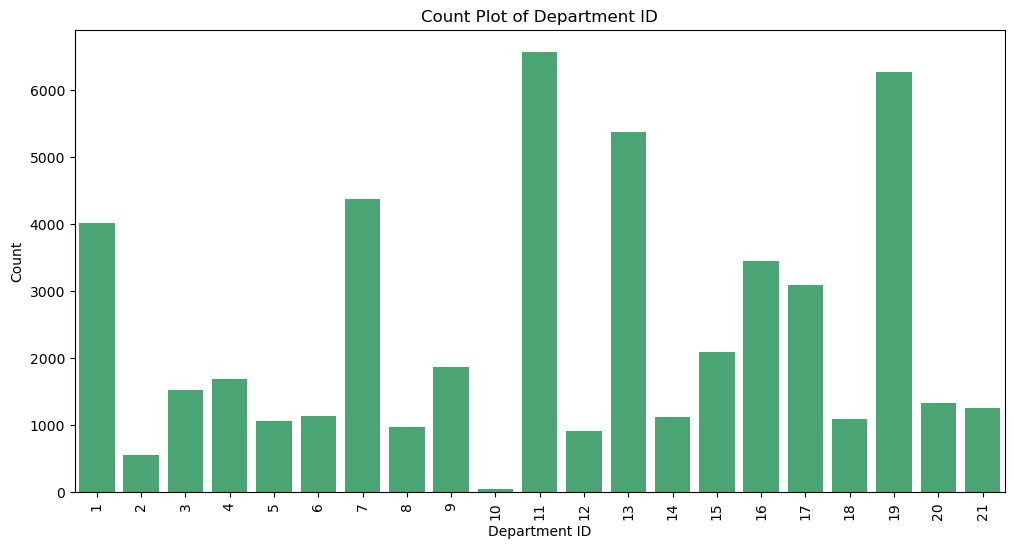

In [29]:
# Department ID
plot_countplot('department_id', products, color='mediumseagreen', title='Count Plot of Department ID', xlabel='Department ID', save_path='../plots/Department_ID_Distribution.jpeg')

#### Key Ineference:
Based on the idea that the total count depicts the total number of products, the following inference can be drawn from the graph:
* Maximum number of items are present in department 11, 13 and 19. 
* Departments 1, 7, 16 and 17 have comparatively lesser number of products present.
* Department 10 has the least number of products present.
* Department 11 and 19 have more than 6000 products, 13 has more than 5000 products.
* Department 1 has 4000 products and 7 has more than 4000 products.
* Department 10 has very few products; likely to be more then 5.

Plot saved to ../plots/Aisle_ID_Distribution.png


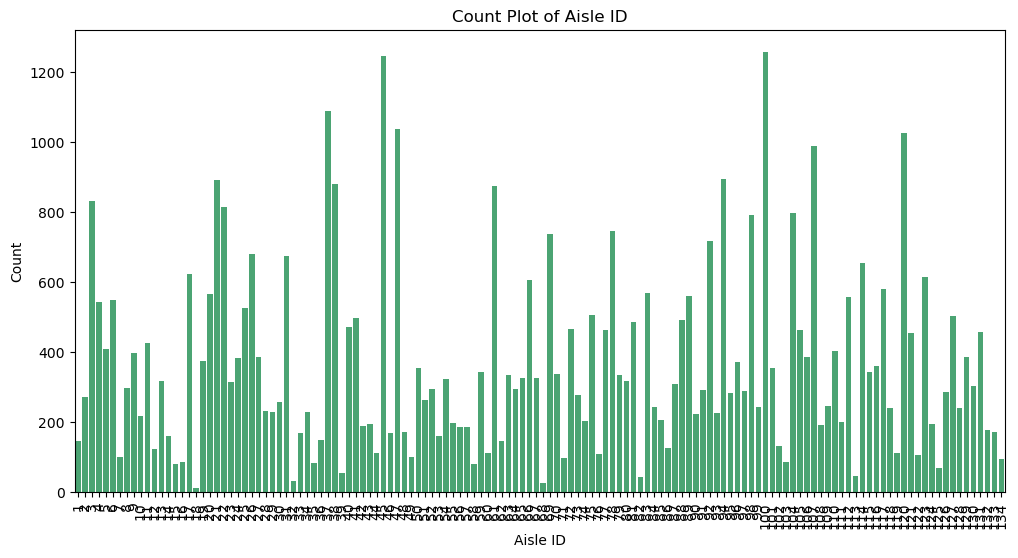

In [30]:
plot_countplot('aisle_id', products, color='mediumseagreen', title='Count Plot of Aisle ID', xlabel='Aisle ID', save_path='../plots/Aisle_ID_Distribution.png')

#### General Observations:
* The distribution of products across aisles appears to be relatively even, with no single aisle dominating the count.
* There seems to be a range of aisle IDs, suggesting a diverse product assortment.
#### Specific Observations:
* Some aisles (e.g., 1, 11, 103) have a higher count of products compared to others.
* Certain aisles (e.g., 18, 22, 25) have a lower count of products.
#### Potential Implications:
* Aisles with higher product counts might be more popular or have higher sales potential.
* Aisles with lower counts might be less popular or have specific product categories.
* The distribution could inform inventory management and shelf space allocation strategies.

Plot saved to ../plots/Order_Number_Distribution.png


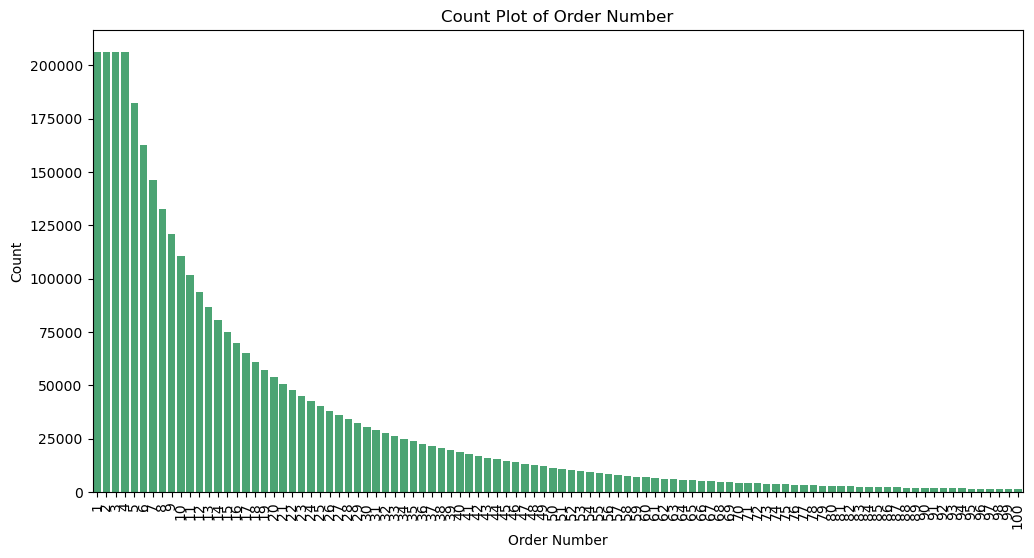

In [31]:
plot_countplot('order_number', orders, color='mediumseagreen', title='Count Plot of Order Number', xlabel='Order Number', save_path='../plots/Order_Number_Distribution.png')

#### General Observations:
* The distribution of order numbers is heavily right-skewed, indicating a large number of orders with lower counts and fewer orders with higher counts.
* This suggests that a small number of orders account for a significant portion of the total orders.
#### Specific Observations:
* There's a sharp decline in the number of orders from the initial peak.
* The count gradually decreases as the order number increases.
* There are some orders with extremely low counts.
#### Potential Implications:
* The right-skewed distribution might indicate varying customer purchase frequencies.
* The initial peak could represent popular or frequently purchased items.
* Orders with low counts might be outliers or specific product categories.

Plot saved to ../plots/DOW_Distribution.png


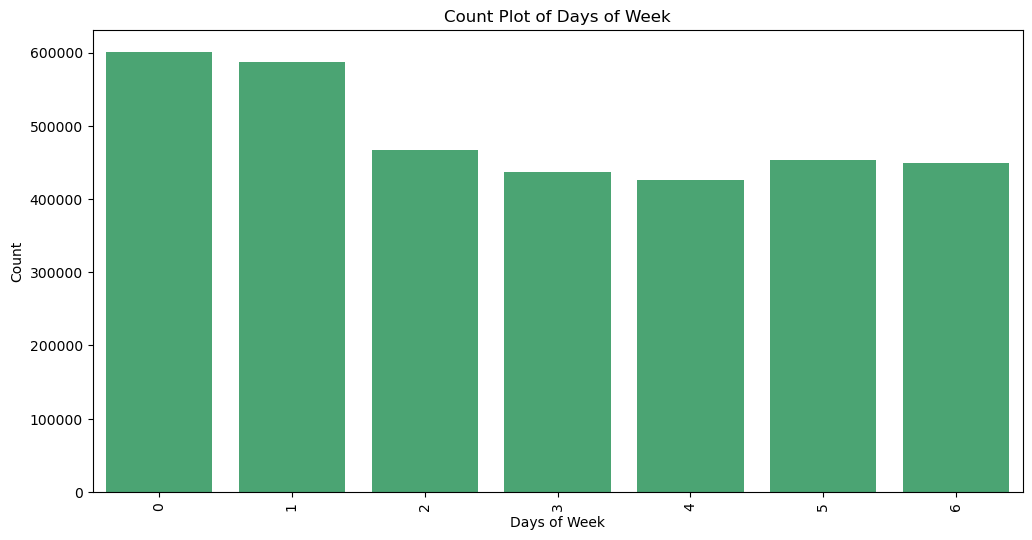

In [32]:
plot_countplot('order_dow', orders, color='mediumseagreen', title='Count Plot of Days of Week', xlabel='Days of Week', save_path='../plots/DOW_Distribution.png')

#### Key Insights:
* Sunday and Monday has the highest number of products ordered by customers. This means that users mostly place orders when they are not working or need items at the start of the week.
* Not many orders are placed in the middle of the week (Wednesday and Thursday) suggesting users are unable to place orders when they are working.
* Overall the distribution of placing orders across the week is almost equivalent suggesting continuous engagement of users and high demand of the products.

Plot saved to ../plots/Order_Hour_of_Day_Distribution.png


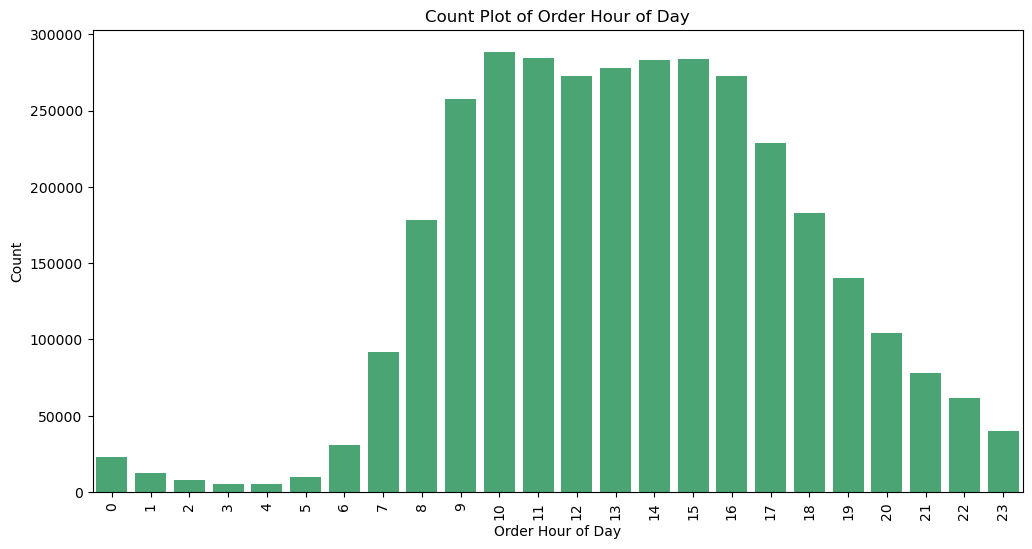

In [33]:
plot_countplot('order_hour_of_day', orders, color='mediumseagreen', title='Count Plot of Order Hour of Day', xlabel='Order Hour of Day', save_path='../plots/Order_Hour_of_Day_Distribution.png')

#### Key Insights:
* Most users are enaged and buying products from 9am to 4pm, suggesting more rush of orders in these hours.
* Very few users are placing orders from 12am to 6am, suggesting a possible emergency or requirement.
* This concludes that more employee engagement is required from 9am to 4pm to manage the rush of orders during these hours.

Plot saved to ../plots/Days_Since_Prior_Order_Distribution.png


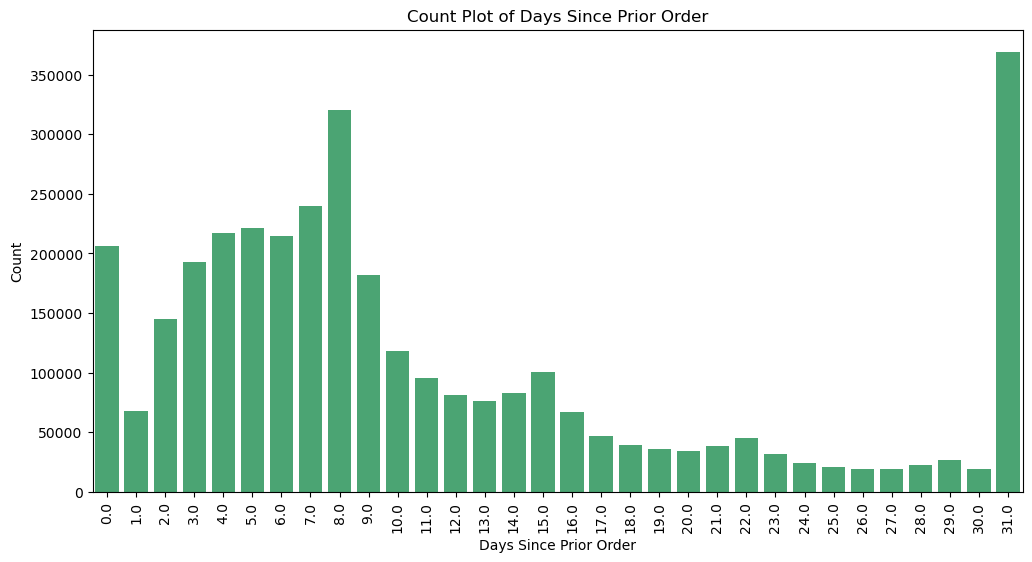

In [34]:
plot_countplot('days_since_prior_order', orders, color='mediumseagreen', title='Count Plot of Days Since Prior Order', xlabel='Days Since Prior Order', save_path='../plots/Days_Since_Prior_Order_Distribution.png')

#### Key Insights:
* **Peak at 30 Days**: The highest order count at 30 days suggests customers tend to return after about a month. Consider targeting this period with promotions or reminders.
* **Moderate Counts (1–8 Days)**: A reasonable number of orders within 1-8 days suggests quick repeat purchases. This could indicate high customer satisfaction or immediate need, and you could use follow-up strategies to capitalize on this.
* **Decreasing Counts**: Counts outside the 1–8 day and 30-day ranges are lower, indicating customers are less likely to repurchase outside these windows. This may suggest a need for re-engagement strategies for long gaps.

Plot saved to ../plots/Add_To_Cart_Order_Distribution.png


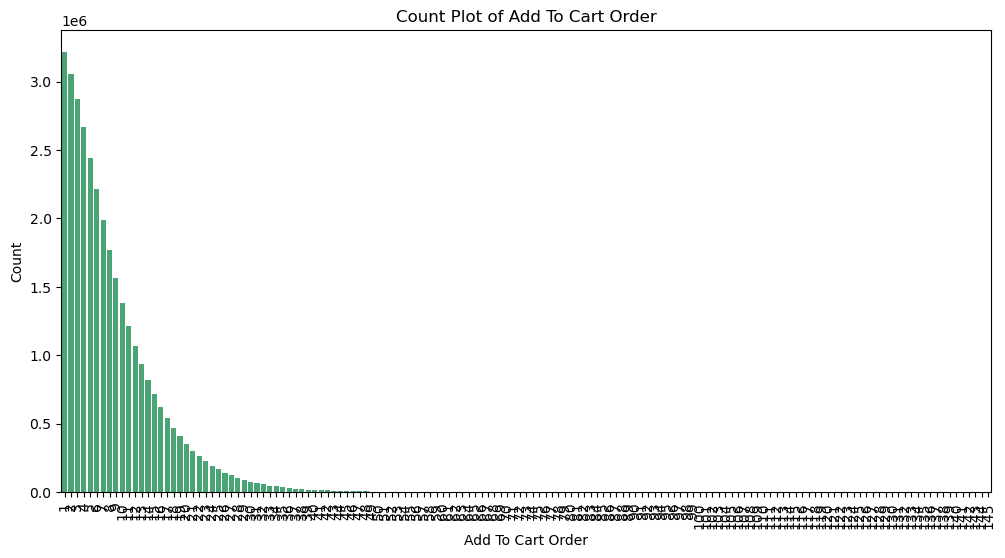

In [35]:
plot_countplot('add_to_cart_order', order_products, color='mediumseagreen', title='Count Plot of Add To Cart Order', xlabel='Add To Cart Order', save_path='../plots/Add_To_Cart_Order_Distribution.png')

#### Key Insights:
* The 'add_to_cart_order' plot shows the distribution of how many products are typically added to the cart. 
* The majority of products are added to the cart in the early stages, with the frequency decreasing as the cart order increases.
* This indicates that customers often add their core/primary items first and then add optional or supplementary items later.
* This information can be crucial for product placement strategies and understanding customer purchase behavior. 
* Understanding this early-stage addition pattern can help optimize product suggestions and promotions during checkout.

Plot saved to ../plots/Reordered_Distribution.png


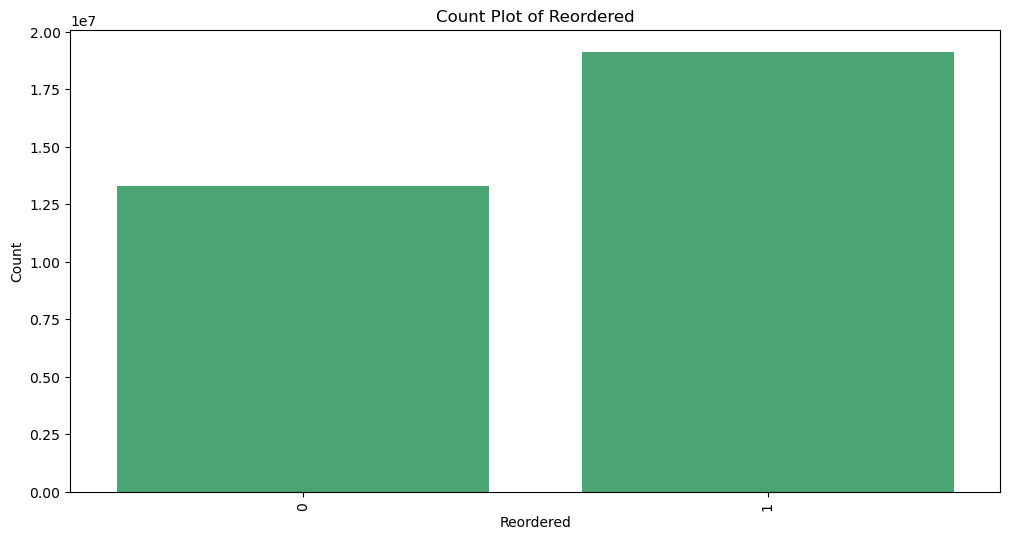

In [36]:
plot_countplot('reordered', order_products, color='mediumseagreen', title='Count Plot of Reordered', xlabel='Reordered', save_path='../plots/Reordered_Distribution.png')

#### Key Insights:
* More number of users have reordered items they have already purchased, suggesting users' requirement of those items.
* Items that users have no reordered could be items that are not as much required as the reordered ones.
* Altough the number of not reordered items are lesser than those reordered, there is a comparatively better balance between the two categories.

Plot saved to ../plots/Days_Since_Prior_Order_Distribution.png


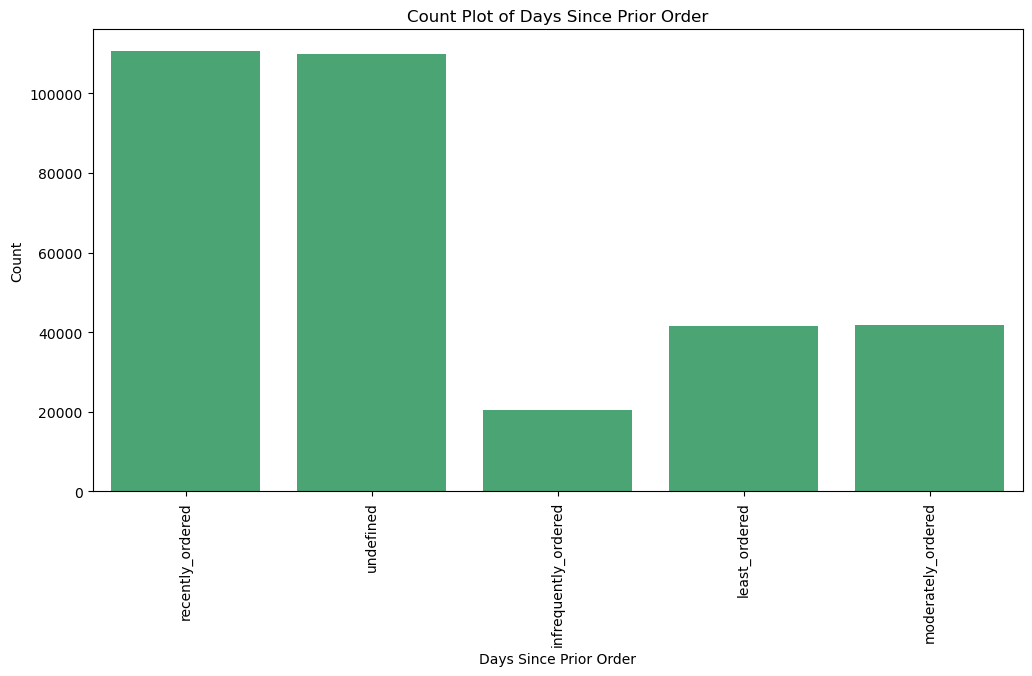

In [37]:
plot_countplot('encoded_days_since_prior_order', data, color='mediumseagreen', title='Count Plot of Days Since Prior Order', xlabel='Days Since Prior Order', save_path='../plots/Days_Since_Prior_Order_Distribution.png')

### Key Insights:
* **Peak at 30 Days**: The highest order count at 30 days suggests customers tend to return after about a month. Consider targeting this period with promotions or reminders.
* **Moderate Counts (1–8 Days)**: A reasonable number of orders within 1-8 days suggests quick repeat purchases. This could indicate high customer satisfaction or immediate need, and you could use follow-up strategies to capitalize on this.
* **Decreasing Counts**: Counts outside the 1–8 day and 30-day ranges are lower, indicating customers are less likely to repurchase outside these windows. This may suggest a need for re-engagement strategies for long gaps.

#### BoxPlot of the datasets

In [38]:
# Function to generate boxplots for numerical columns in a dataset
def plot_boxplots(dataframe, color='mediumseagreen', figsize=(20, 10), save_path=None):

    # Get all numerical columns
    numerical_columns = dataframe.select_dtypes(include=np.number).columns
    
    # Create a figure for boxplots
    plt.figure(figsize=figsize)
    
    # Iterate through numerical columns and create boxplots
    for idx, column in enumerate(numerical_columns):
        plt.subplot(2, 3, idx + 1)  # Adjust this to control the grid layout
        sns.boxplot(x=dataframe[column], color=color)
        plt.title(f'Boxplot of {column}')
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    
    
    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path)
        print(f"Plot saved to {save_path}")

    # Show the plot
    plt.show()

Plot saved to ../plots/orders_boxplot.png


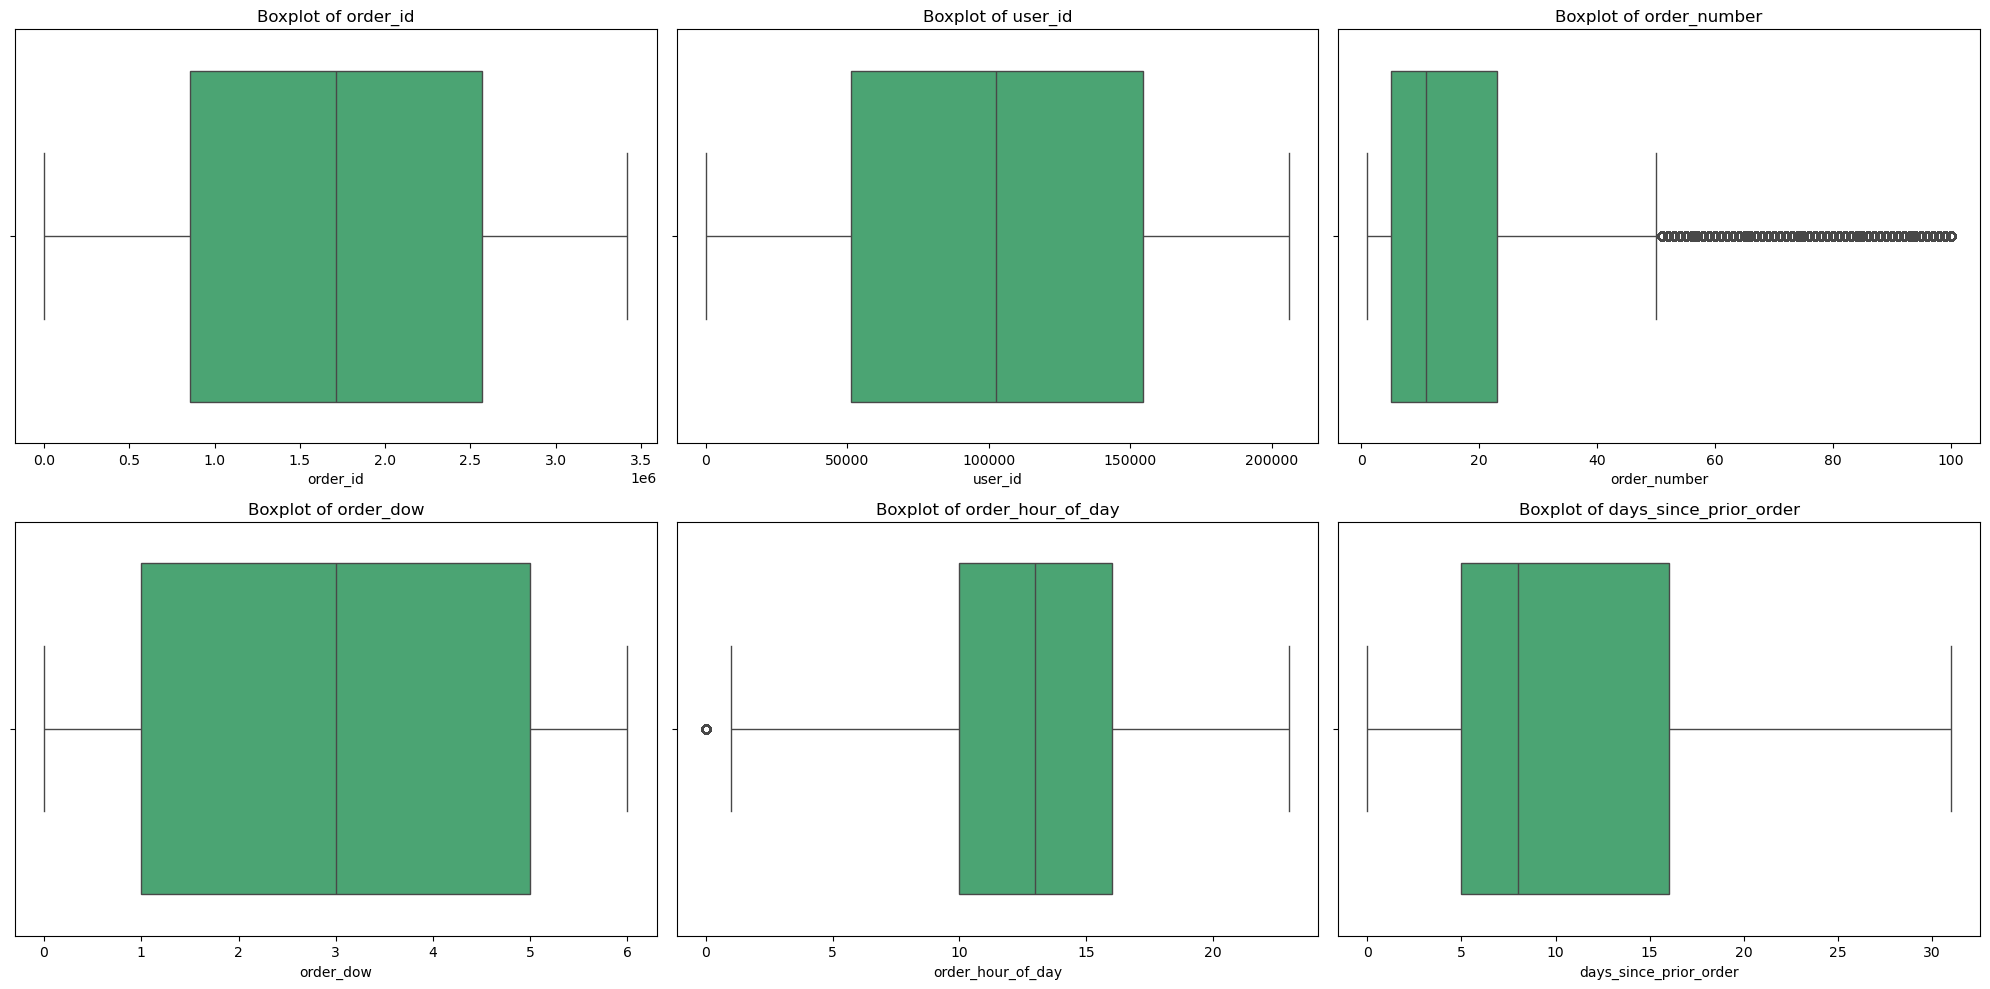

In [39]:
plot_boxplots(orders, color='mediumseagreen', save_path='../plots/orders_boxplot.png')

#### Key Insights:

1. **order_id:** 
* The boxplot for order_id shows a wide range of values, indicating a large number of unique orders.
* The presence of outliers suggests that some order IDs might be associated with a larger volume of products or purchases.

2. **user_id:**
* The boxplot for user_id also indicates a large range of unique user IDs.
* Outliers suggest that some users might place a significantly larger number of orders compared to others.

3. **order_number:**
* The boxplot for order_number shows a positive skew, indicating that most users have a relatively low number of orders but some have a significantly larger number.
* This suggests that a certain proportion of users are more frequent customers.

4. **order_dow:**
* The boxplot for order_dow represents the day of the week when orders are placed.
* The boxplot shows the distribution of orders across the 7 days of the week.
* The mean or median of this plot can help identify which day of the week is the most active in terms of orders.

5. **order_hour_of_day:**
* The boxplot for order_hour_of_day reveals the distribution of orders throughout the day.
* It can help understand peak ordering hours.
* The mean or median can indicate the most frequent hours for placing orders.

6. **days_since_prior_order:**
* The boxplot for days_since_prior_order shows the distribution of time intervals between orders for customers. 
* The presence of outliers suggests that some customers have long gaps between orders, possibly indicating less frequent buyers, while others have frequent orders.

Plot saved to ../plots/products_boxplot.png


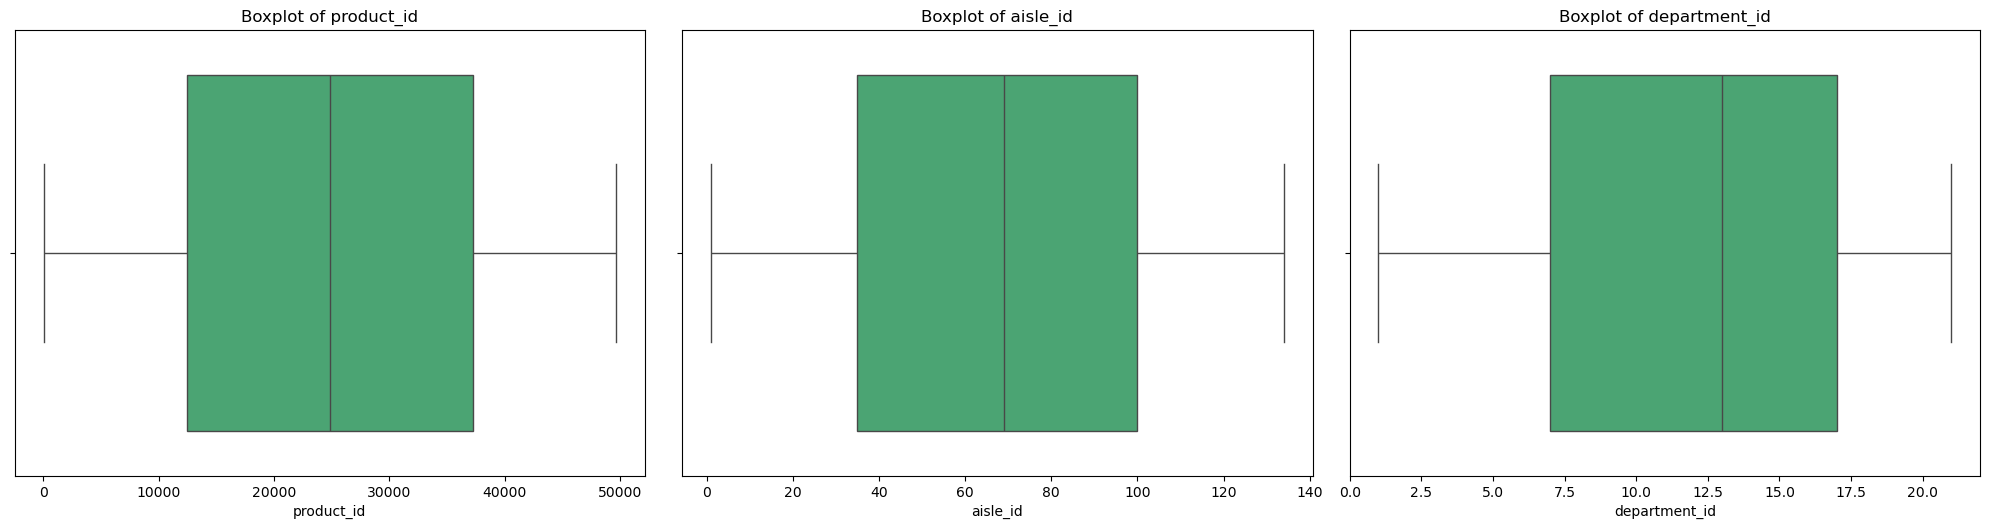

In [40]:
plot_boxplots(products, color='mediumseagreen', save_path='../plots/products_boxplot.png')

#### Key Insights:
1. **product_id:**
* The boxplot for product_id shows a wide range of values, indicating a large number of unique products.
* The presence of outliers suggests that some product IDs might be associated with higher sales or more popular products.

2. **aisle_id:**
* The boxplot for aisle_id illustrates the distribution of products across different aisles.
* The presence of outliers might suggest that some aisles have more products than others.

3. **department_id:**
* The boxplot for department_id displays the distribution of products across various departments.
* Similarly to aisle_id, the outliers might point to some departments having more products or perhaps more popular product categories.

In essence, the boxplots provide a visual overview of the distribution of numerical features in the Products dataset. They highlight potential trends in the number of products, product popularity based on sales, and their distribution across different aisles and departments.

#### Inference:

* **Inventory Management:** Understanding which aisles or departments have more products and if there is a potential imbalance in inventory. 
* **Product Recommendations:** Identifying popular product categories or aisles based on the sales or distribution of products within those categories or aisles.
* **Store Layout:** Optimizing product placement and store layout based on the popularity or placement of products across aisles and departments.

Plot saved to ../plots/order_products_boxplot.png


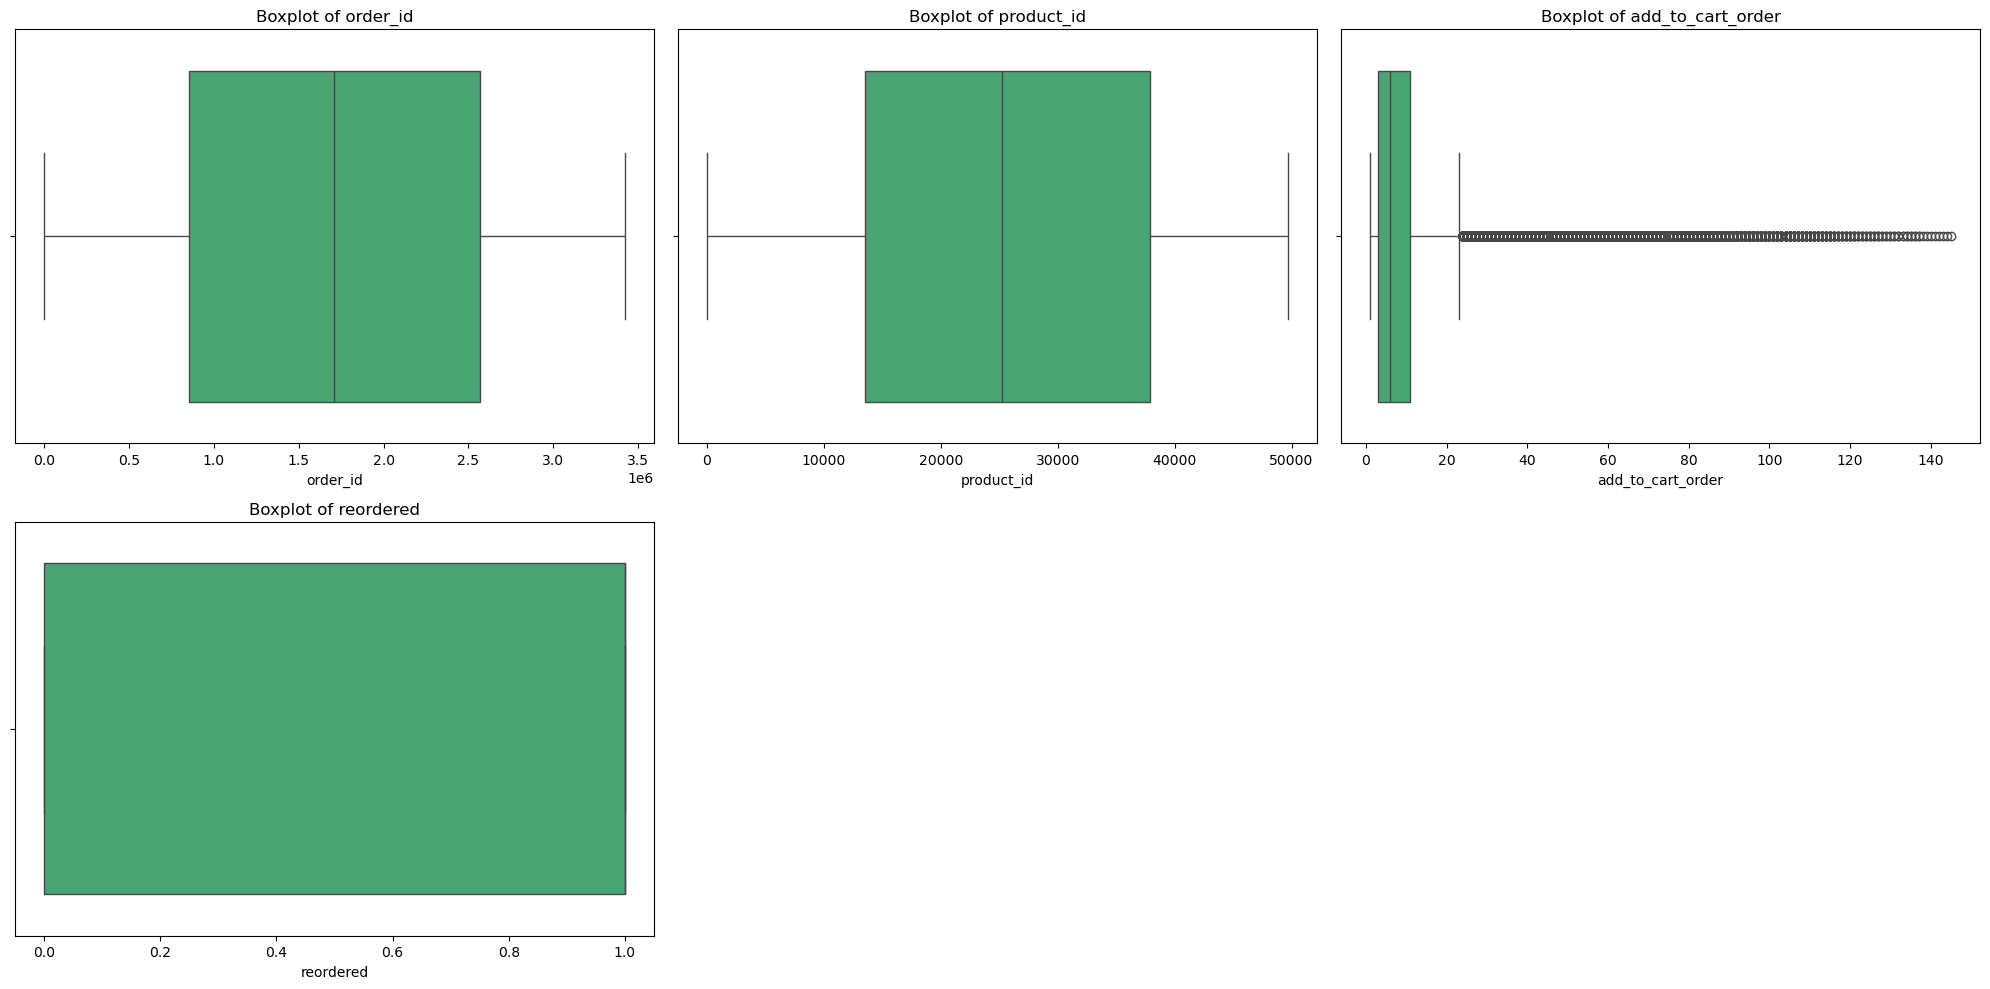

In [41]:
plot_boxplots(order_products, color='mediumseagreen', save_path='../plots/order_products_boxplot.png')

#### Key Insights:
1. **order_id:**
* The boxplot for order_id shows a wide range of values, indicating a large number of unique orders.
* The presence of outliers suggests that some order IDs might be associated with a larger number of products or higher total order values.

2. **product_id:**
* The boxplot for product_id indicates a wide range of unique product IDs.
* The presence of outliers suggests that certain products might be more frequently ordered or appear in more orders than others. This could indicate popular or frequently purchased products.

3. **add_to_cart_order:**
* The boxplot for add_to_cart_order illustrates the distribution of the order in which products are added to the cart. 
* It reveals that the majority of products are added early in the cart, while some outliers represent products added later in the cart. This could potentially reflect a difference in customer behavior, like prioritizing essential products first or adding impulse purchases later.

4. **reordered:**
* The boxplot for reordered shows the distribution of products that were reordered or not.
* It provides a visual representation of the proportion of products that are frequently repurchased.
* It can indicate the tendency for customers to reorder certain types of products.

In essence, the boxplots provide a visual overview of the distribution of numerical features in the Order Products dataset. They highlight potential trends in order size, product popularity, and customer ordering behavior. 
#### Inference:

* **Product Recommendations:** Identifying frequently reordered products and suggesting them to customers during their next order.
* **Marketing Strategies:** Targeting customers with products that are frequently reordered or that have been added early in the cart.
* **Inventory Management:** Monitoring the popularity and reorder rates of products to optimize stock levels.
* **Cart Optimization:** Understanding how products are added to the cart to create better strategies for product suggestions and placement. 

### Bivariate Analysis

In [42]:
def plot_bar(data, x_col, y_col, title, xlabel, ylabel, color='mediumseagreen', rotate_xticks=False, figsize=(10, 6)):

    plt.figure(figsize=figsize)
    sns.barplot(x=x_col, y=y_col, data=data, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Rotate x-ticks if needed
    if rotate_xticks:
        plt.xticks(rotation=45)
    
    plt.show()

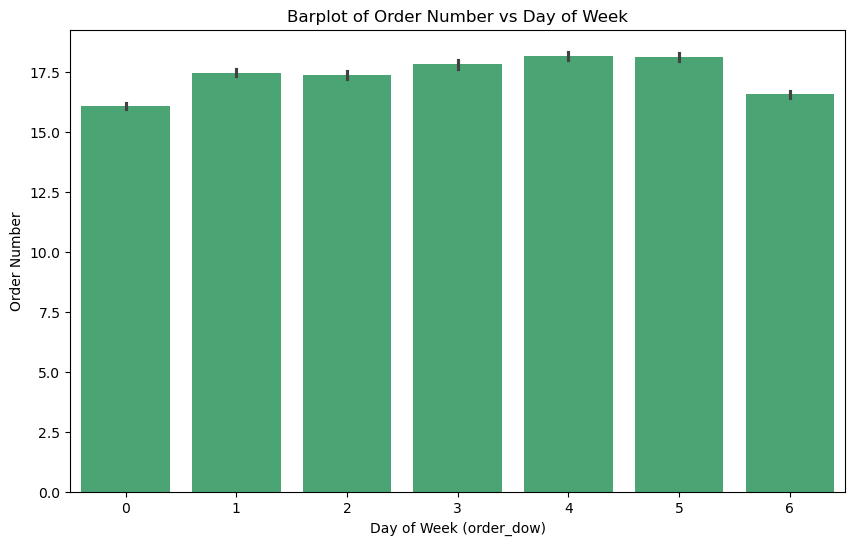

In [43]:
# Barplot for Order Number vs Day of Week
plot_bar(
    data=data,
    x_col='order_dow',
    y_col='order_number',
    title='Barplot of Order Number vs Day of Week',
    xlabel='Day of Week (order_dow)',
    ylabel='Order Number'
)

### Key Insights:
* **Slight Variation by Day:** The boxplot shows slight variation in the number of orders across different days of the week, with some days having a higher average number of orders than others.
* **Influencing Factors:** This variation suggests that customer behavior may be influenced by factors such as work schedules, weekends, or specific events.
* **Consistent Ordering Trend:** Overall, the trend indicates that the number of orders is relatively consistent across all days of the week.
* **Regular Ordering Behavior:** This suggests that customers are placing orders regularly throughout the week.

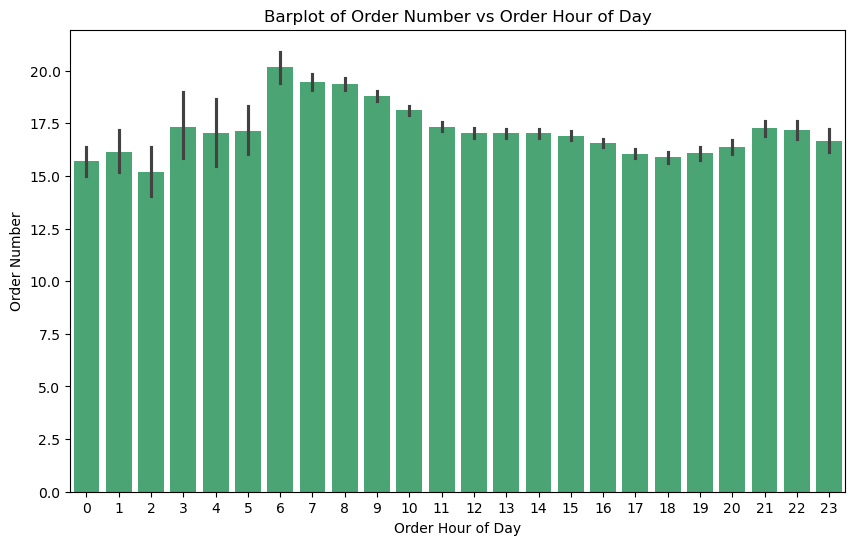

In [44]:
# Barplot for Order Number vs Order Hour of Day
plot_bar(
    data=data,
    x_col='order_hour_of_day',
    y_col='order_number',
    title='Barplot of Order Number vs Order Hour of Day',
    xlabel='Order Hour of Day',
    ylabel='Order Number'
)

### Key Insights:
* **Peak in Midday:** The boxplot shows a clear peak around the middle of the day, indicating most orders are placed during this time.
* **Influence of Daily Routines:** This suggests that customer behavior is influenced by daily routines and work schedules.
* **Variation in Order Distribution:** The distribution of order numbers within each hour bin varies, with some hours showing a wider spread than others.
* **Other Influencing Factors:** The varying distribution suggests that factors like promotions, sales, or specific events may also influence ordering patterns.
* **Insights for Business Operations:** The boxplot provides valuable insights into customer purchasing behavior, which can be used to optimize marketing strategies, inventory management, and customer service.
* **Resource Allocation:** By understanding peak ordering hours, businesses can allocate resources effectively and ensure timely order fulfillment.

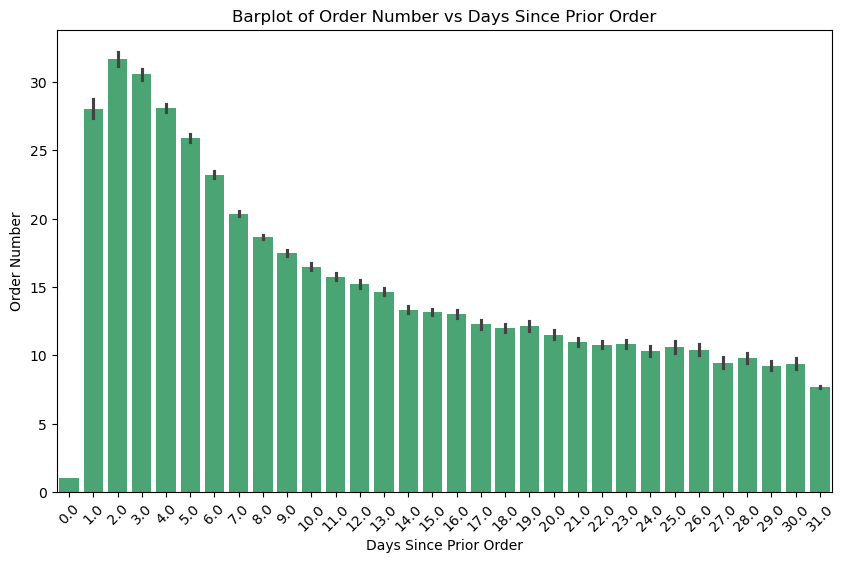

In [45]:
# Barplot for Order Number vs Days Since Prior Order
plot_bar(
    data=data,
    x_col='days_since_prior_order',
    y_col='order_number',
    title='Barplot of Order Number vs Days Since Prior Order',
    xlabel='Days Since Prior Order',
    ylabel='Order Number',
    rotate_xticks=True
)

### Key Insights:
* **Downward Trend:** There is a clear downward trend in the boxplot, showing that as the number of days since the last order increases, the number of orders placed decreases.
* **Recency Effect:** This suggests customer behavior is influenced by recency, with customers more likely to place orders shortly after their previous purchase.
* **Variation in Order Distribution:** The distribution of order numbers within each "day since prior order" bin varies, with some bins having a wider spread than others.
* **Other Influencing Factors:** The varying distribution suggests that factors like product availability, promotions, or seasonal trends may also impact order frequency.
* **Insights for Marketing & Strategy:** The boxplot provides insights into customer purchasing patterns, which can be leveraged to inform marketing strategies, inventory management, and customer retention.

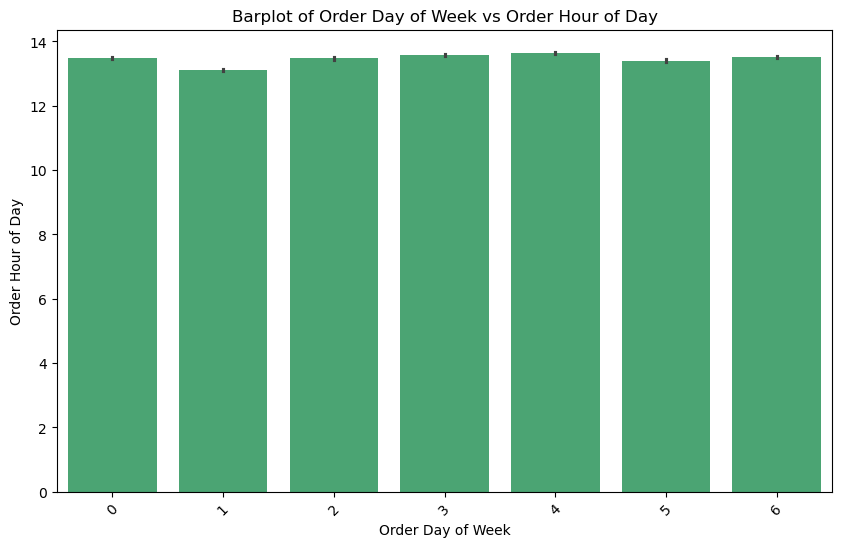

In [46]:
# Barplot for Order Day of Week vs Order Hour of Day
plot_bar(
    data=data,
    x_col='order_dow',
    y_col='order_hour_of_day',
    title='Barplot of Order Day of Week vs Order Hour of Day',
    xlabel='Order Day of Week',
    ylabel='Order Hour of Day',
    rotate_xticks=True
)

### Key Insights:
* **Consistent Pattern by Day:** The boxplot shows a relatively consistent pattern across different days of the week, indicating that customer ordering behavior is not significantly influenced by the specific day.
* **Slight Variations in Order Hour:** There are slight variations in the average order hour across different days, but these differences are not substantial.
* **Similar Ordering Times:** The overall trend suggests that customers tend to place orders at similar times regardless of the day of the week.
* **Business Implications:** This information can help businesses plan staffing schedules, inventory management, and customer service operations effectively.

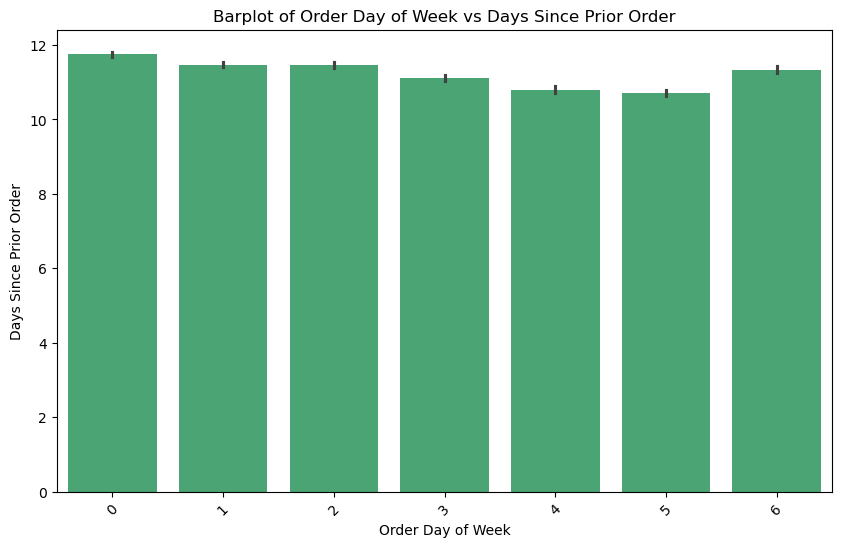

In [47]:
# Barplot for Order Day of Week vs Days Since Prior Order
plot_bar(
    data=data,
    x_col='order_dow',
    y_col='days_since_prior_order',
    title='Barplot of Order Day of Week vs Days Since Prior Order',
    xlabel='Order Day of Week',
    ylabel='Days Since Prior Order',
    rotate_xticks=True
)

#### Key Insights: 
* **Consistent Pattern by Day:** The boxplot shows a relatively consistent pattern across different days of the week, indicating that customer purchasing behavior is not significantly influenced by the specific day.
* **Slight Variations:** There are slight variations in the average days since the prior order, but these differences are not substantial.
* **Similar Frequency of Orders:** The overall trend suggests that customers tend to place orders with a similar frequency regardless of the day of the week.

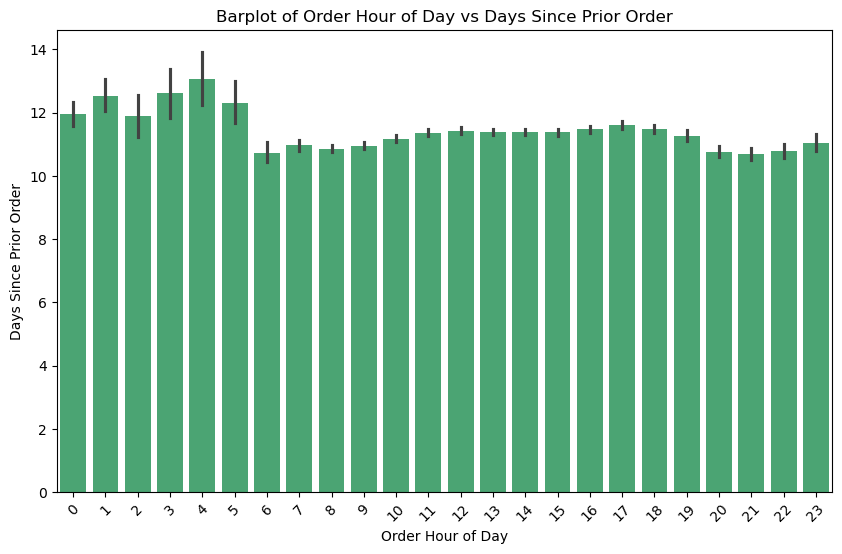

In [48]:
# Barplot for Order Hour of Day vs Days Since Prior Order
plot_bar(
    data=data,
    x_col='order_hour_of_day',
    y_col='days_since_prior_order',
    title='Barplot of Order Hour of Day vs Days Since Prior Order',
    xlabel='Order Hour of Day',
    ylabel='Days Since Prior Order',
    rotate_xticks=True
)

### Key Insights:
* **Slight Variation by Hour:** The bar plot shows slight variation in the average days since the prior order across different hours of the day.
* **No Clear Trend:** There is no clear trend in the relationship between order hour and days since the prior order.
* **Subtle Differences in Behavior:** The plot suggests subtle differences in customer behavior at different times of the day.
* **Frequent Ordering at Certain Hours:** Customers who place orders during certain hours may tend to order more frequently than those who order at other times.

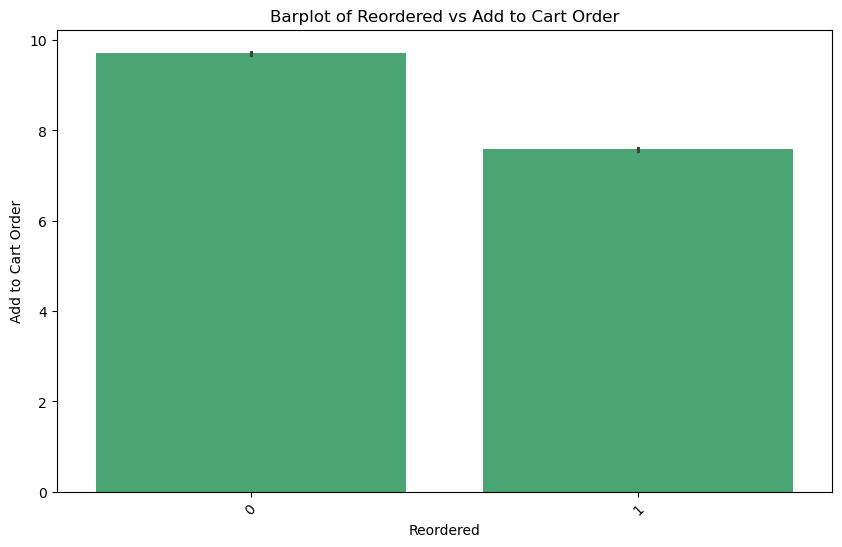

In [49]:
# Barplot for Reordered vs Add to Cart Order
plot_bar(
    data=data,
    x_col='reordered',
    y_col='add_to_cart_order',
    title='Barplot of Reordered vs Add to Cart Order',
    xlabel='Reordered',
    ylabel='Add to Cart Order',
    rotate_xticks=True
)

### Multivariate Analysis

In [50]:
def plot_correlation_heatmap(df, figsize=(10, 8), cmap='Greens', annot=True, fmt=".2f", title="Correlation Heatmap", save_path=None):

    # Select only the numeric columns from the dataframe
    df_numeric = df.select_dtypes(include=np.number)
    
    # Compute the correlation matrix
    correlation_matrix = df_numeric.corr()

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=annot, cmap=cmap, fmt=fmt, cbar=True, square=True, linewidths=0.5)
    
    # Set the title
    plt.title(title)
    
    # If a save path is provided, save the figure
    if save_path:
        plt.savefig(save_path)
        print(f"Heatmap saved to {save_path}")
    
    # Show the plot
    plt.show()

Heatmap saved to ../plots/product_correlation_heatmap.png


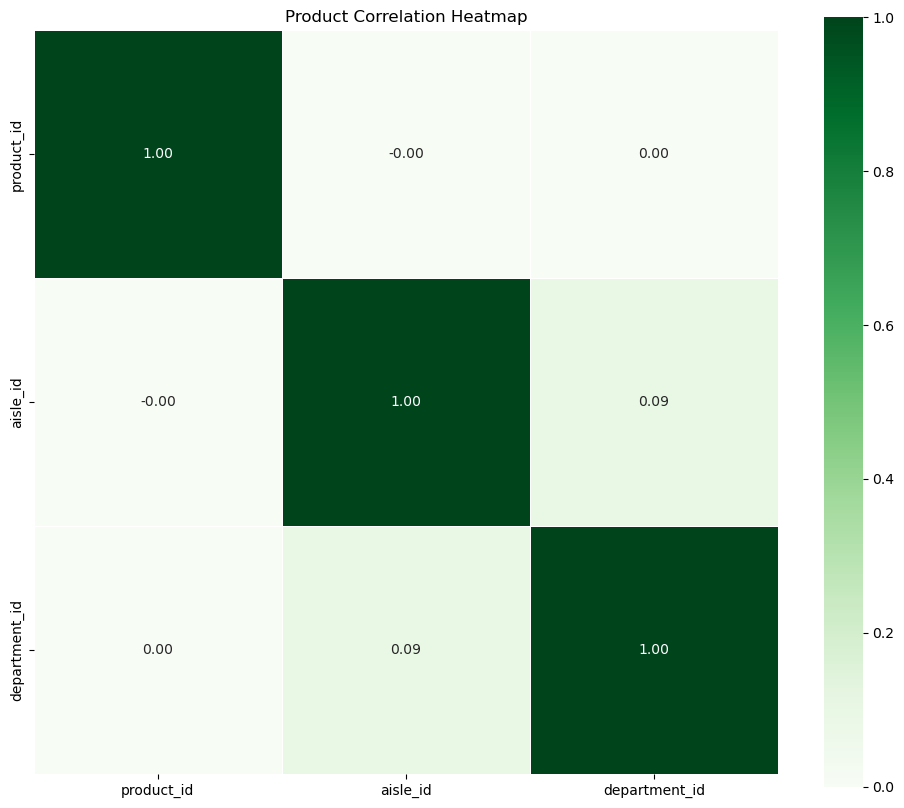

In [51]:
# Plotting and saving the correlation heatmap for the 'products' dataset
plot_correlation_heatmap(products, figsize=(12, 10), cmap='Greens', annot=True, fmt='.2f', 
                         title='Product Correlation Heatmap', save_path='../plots/product_correlation_heatmap.png')

### Key Insights:
* **Weak Correlations:**
1. product_id and aisle_id have a very weak negative correlation (-0.00). This suggests that
there is no significant linear relationship between these two variables.
2. product_id and department_id have a very weak positive correlation (0.00). This indicates
a negligible linear relationship between these variables.
3. aisle_id and department_id have a slightly stronger positive correlation (0.09). This
suggests a weak positive linear relationship, meaning that as the aisle ID increases, the
department ID tends to increase slightly.
* **Strong Positive Correlations:**
1. The diagonal elements, which represent the correlation of a variable with itself, are all 1.00.
This is expected as a variable is perfectly correlated with itself.

**Overall:** The heatmap indicates that there are no strong correlations between the variables in the
Products dataset. This suggests that these variables are relatively independent of each other and may
not have significant linear relationships.

Heatmap saved to ../plots/orders_correlation_heatmap.png


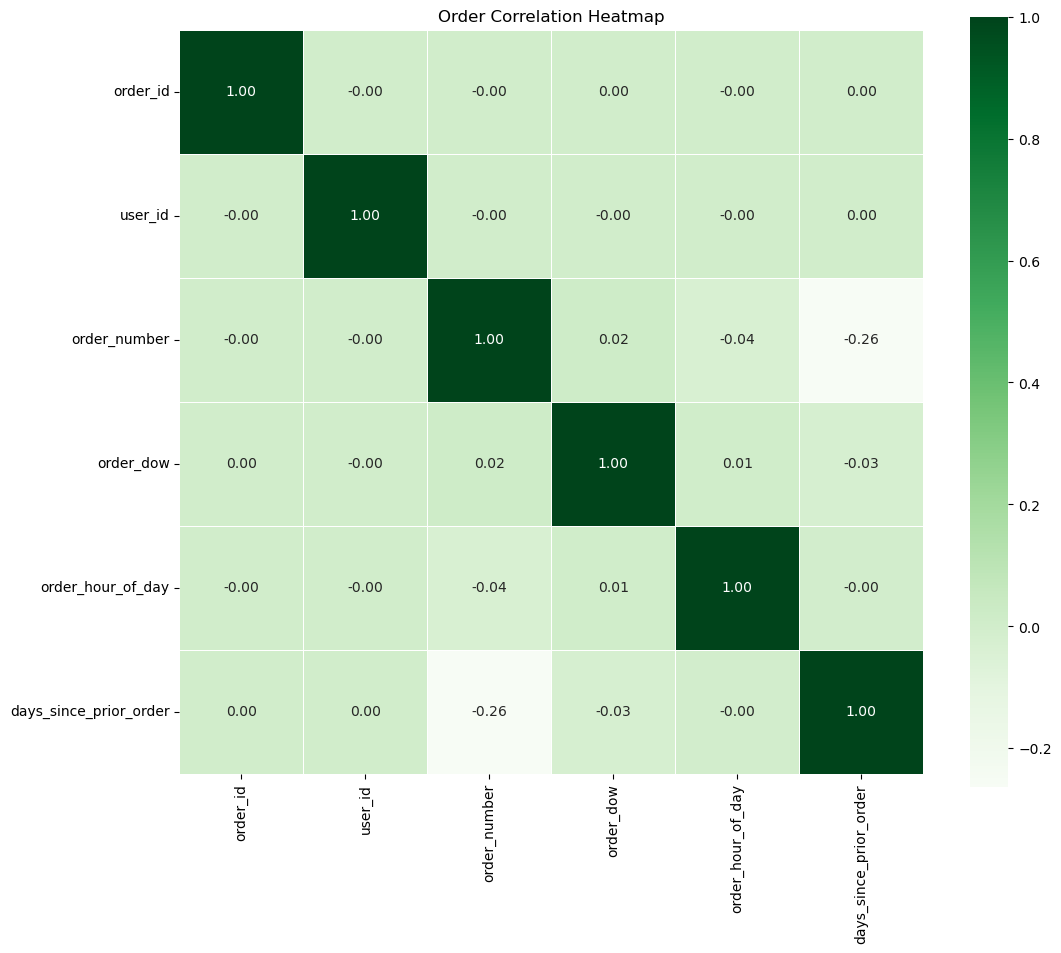

In [52]:
# Plotting and saving the correlation heatmap for the 'orders' dataset
plot_correlation_heatmap(orders, figsize=(12, 10), cmap='Greens', annot=True, fmt='.2f', 
                         title='Order Correlation Heatmap', save_path='../plots/orders_correlation_heatmap.png')

#### Key Insights:
* **Weak Correlations:**
1. order_id has weak correlations with all other variables, indicating no significant linear
relationship.
2. user_id has weak correlations with all other variables, suggesting no significant linear
relationship between user ID and other factors like order number, day of week, or order
hour.
3. order_number has a weak negative correlation (-0.26) with days_since_prior_order. This
indicates that as the number of days since the prior order increases, the order number tends
to decrease slightly. This could be due to factors like customer churn or reduced purchasing
frequency over time.
* **Moderate Negative Correlation:**
1. order_number has a moderate negative correlation (-0.26) with days_since_prior_order.
This indicates a moderate negative linear relationship, meaning that as the number of days
since the prior order increases, the order number tends to decrease.
* **No Strong Correlations:**
1. Most of the other correlations are very weak or close to zero, indicating no significant linear
relationships between the variables.

**Overall:** The heatmap suggests that there are no strong correlations between the variables in the
Orders dataset, except for the moderate negative correlation between order number and days since
prior order. This indicates that these variables are relatively independent of each other and may not
have significant linear relationships.

Heatmap saved to ../plots/order_products_correlation_heatmap.png


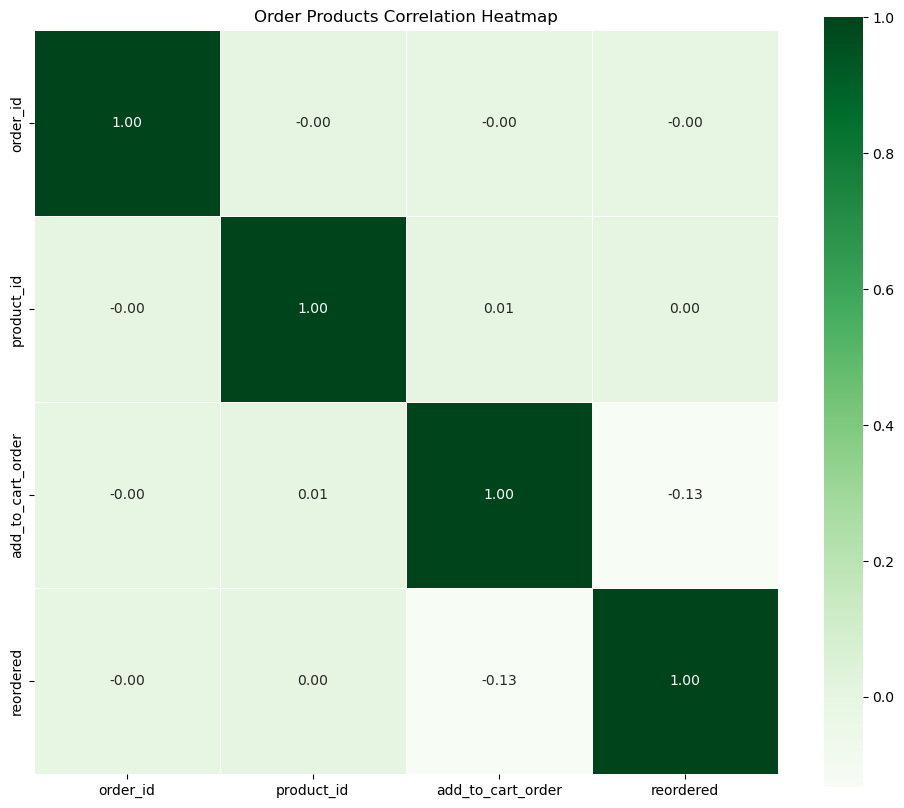

In [53]:
# Plotting and saving the correlation heatmap for the 'order_products' dataset
plot_correlation_heatmap(order_products, figsize=(12, 10), cmap='Greens', annot=True, fmt='.2f', 
                         title='Order Products Correlation Heatmap', save_path='../plots/order_products_correlation_heatmap.png')

#### Key Insights:
* **Weak Correlations:**
1. order_id has weak correlations with all other variables, indicating no significant linear
relationship.
2. product_id has a very weak positive correlation (0.01) with add_to_cart_order, suggesting
a negligible linear relationship.
3. add_to_cart_order has a weak negative correlation (-0.13) with reordered. This indicates
that as the position of the product in the cart increases, the likelihood of it being reordered
decreases slightly.
* **No Strong Correlations:**
1. Most of the other correlations are very weak or close to zero, indicating no significant linear
relationships between the variables.

**Overall:** The heatmap suggests that there are no strong correlations between the variables in the Order
Products dataset, except for the weak negative correlation between add_to_cart_order and
reordered. This indicates that these variables are relatively independent of each other and may not
have significant linear relationships.

Heatmap saved to ../plots/data_correlation_heatmap.png


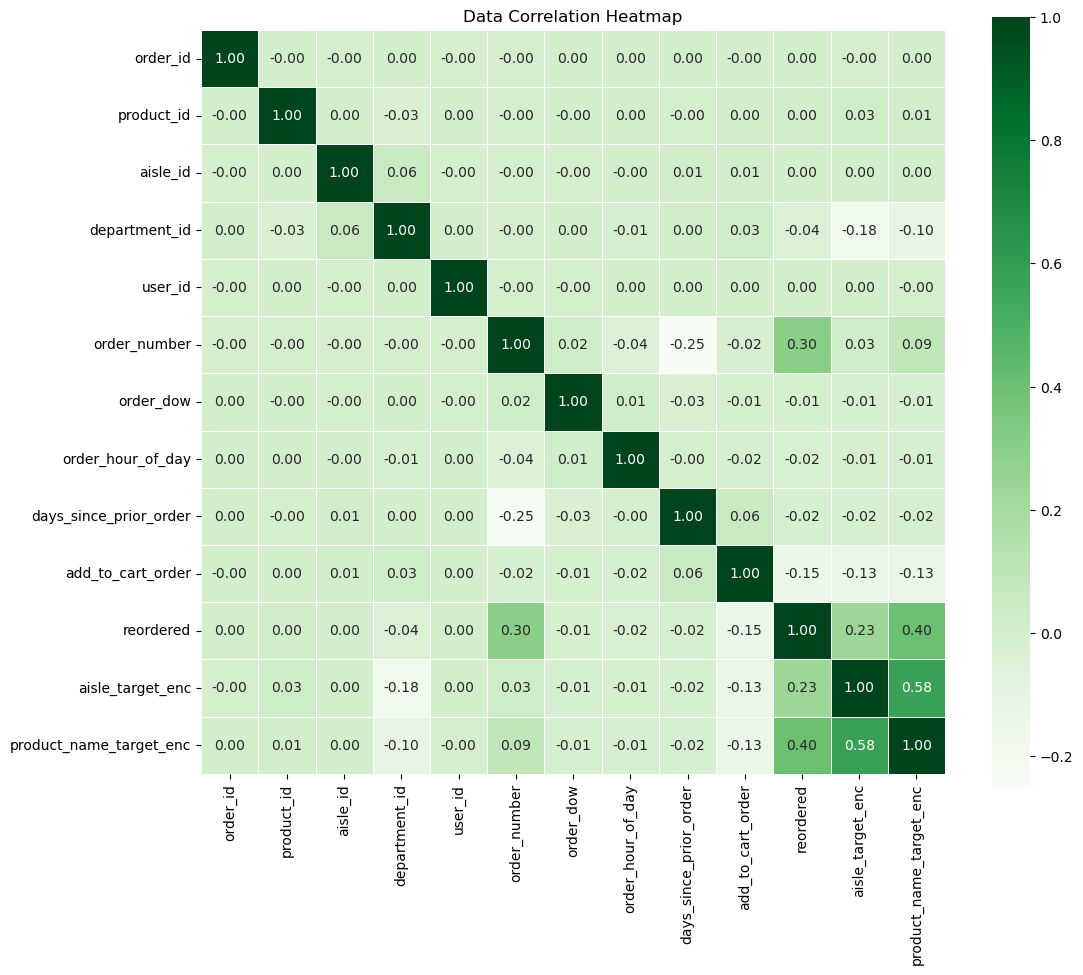

In [54]:
# Plotting and saving the correlation heatmap for the 'data' dataset
plot_correlation_heatmap(data, figsize=(12, 10), cmap='Greens', annot=True, fmt='.2f', 
                         title='Data Correlation Heatmap', save_path='../plots/data_correlation_heatmap.png')

#### Key Insights: 
* **Weak Correlations:**
1. order_id has weak correlations with all other variables, indicating no significant linear
relationship.
2. product_id has very weak correlations with other variables, suggesting no significant linear
relationship.
3. add_to_cart_order has a weak negative correlation (-0.13) with reordered. This indicates
that as the position of the product in the cart increases, the likelihood of it being reordered
decreases slightly.
* **Moderate Negative Correlation:**
1. order_number has a moderate negative correlation (-0.25) with days_since_prior_order.
This indicates a moderate negative linear relationship, meaning that as the number of days
since the prior order increases, the order number tends to decrease.
* **No Strong Correlations:**
1. Most of the other correlations are very weak or close to zero, indicating no significant linear
relationships between the variables.

**Overall:** The heatmap suggests that there are no strong correlations between the variables in the Order
Products dataset, except for the moderate negative correlation between order number and days since
prior order. This indicates that these variables are relatively independent of each other and may not
have significant linear relationships.